# Data Resources
We get stock prices of Estee Lauder Group from YahooFinance via a Python library called: yfinance.

After getting the data, save it to a csv for further analysis.

In [1]:
# import libraries

import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import mplfinance as mpf

In [2]:
# Get data on Estee Lauder from Yahoo Finance from 2019
esteelauder = yf.Ticker("EL")
df = esteelauder.history(start="2019-01-01")

In [3]:
# Export raw data to csv
import os
path = '../Data/estee_stock_price.csv'
os.makedirs(os.path.dirname(path), exist_ok=True)
df.to_csv(path)

In [4]:
df = pd.read_csv('../Data/estee_stock_price.csv',parse_dates=['Date'], index_col='Date')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,121.553915,123.949446,121.151549,123.462852,1640100,0.0,0.0
2019-01-03 00:00:00-05:00,121.460333,122.470945,117.155878,117.605042,3863900,0.0,0.0
2019-01-04 00:00:00-05:00,119.289392,122.386714,118.868300,121.572617,2091400,0.0,0.0
2019-01-07 00:00:00-05:00,121.104770,123.883949,120.253234,123.051132,2312500,0.0,0.0
2019-01-08 00:00:00-05:00,124.510887,125.212699,122.274445,124.202087,1989100,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-08 00:00:00-05:00,65.830002,65.830002,63.599998,63.900002,5676900,0.0,0.0
2024-11-11 00:00:00-05:00,64.489998,66.730003,63.799999,64.589996,5866400,0.0,0.0
2024-11-12 00:00:00-05:00,64.239998,64.239998,62.290001,62.740002,5974700,0.0,0.0


# Data Overview

## Line Plot of Close Price with SMA



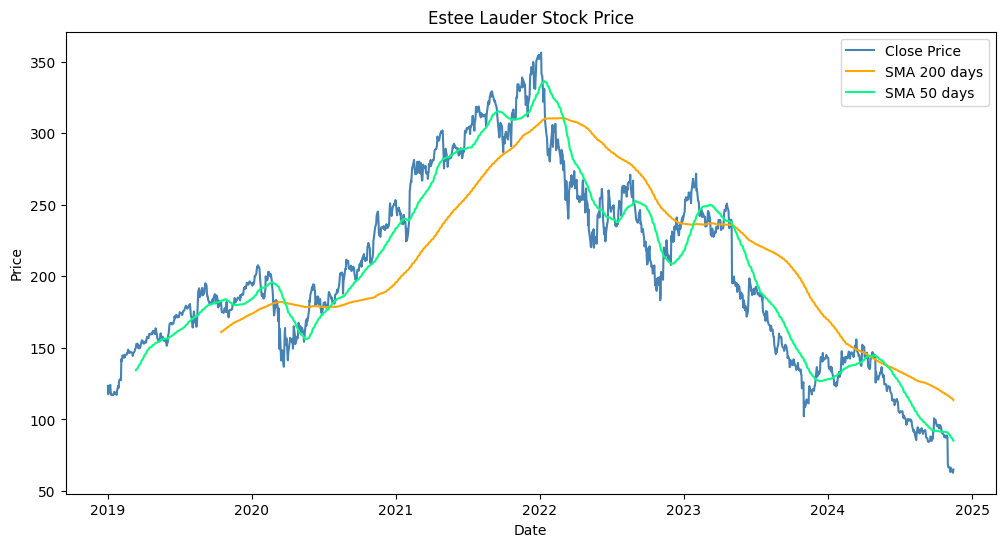

In [5]:
# Plot the data
df['SMA_50'] = df['Close'].rolling(window=50).mean() # mid-term trend
df['SMA_200'] = df['Close'].rolling(window=200).mean() # long-term trend

plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Close'], label='Close Price', color='steelblue')
# simple running average
plt.plot(df.index, df['SMA_200'], label='SMA 200 days', color='orange')
plt.plot(df.index, df['SMA_50'], label='SMA 50 days', color='springgreen')

plt.title('Estee Lauder Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.show()

### Conclusion:

#### Long-Term Trend (200 Days SMA)

**Upward then Downward Trend:** 
Despite some fluctuations, Estee Lauder's stock price trended upwards until early 2022. However, from 2022 to the present, it has shown a downward trend, indicating a shift in investor confidence and possibly reflecting changes in the company's performance or market conditions.

In 2020 and 2021, with lockdowns and social distancing, people spent more time at home and invested in self-care, including skincare products-the main field invested in and the primary source of revenue among Estee Lauder's cosmetic products. Hence, the demand for beauty products recovered after the COVID-19 pandemic as well as company's stock price increased. 

However, many factors( mainly related to COVID-19) have contributed to the decline in Estee Lauder's stock price from 2022 up to now, including: 

*Supply chain:* COVID-19 disrupted global transportation, slowing material and product supply.

*Inflation:* Higher production expenses due to the rising material and shipping costs had led to higher retail prices for many products.

*Customer demand decreased:* Economic uncertainty due to long-term pandemic caused customers to cut back on luxury spending, especially Estee Lauder, a luxury brand.

## Candlestick Chart of Stock Price by month



In [6]:
# Resample the data to monthly
df.index = pd.to_datetime(df.index, utc=True)
stock_price_by_month = df.resample('M').agg({'Open': 'first', 
                                       'High': 'max', 
                                       'Low': 'min', 
                                       'Close': 'last', 
                                       'Volume': 'sum'})
# Prepare the data for mplfinance
stock_price_by_month.index = pd.to_datetime(stock_price_by_month.index)



C:\Users\lamma\AppData\Local\Temp\ipykernel_32284\2045643122.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_price_by_month = df.resample('M').agg({'Open': 'first',


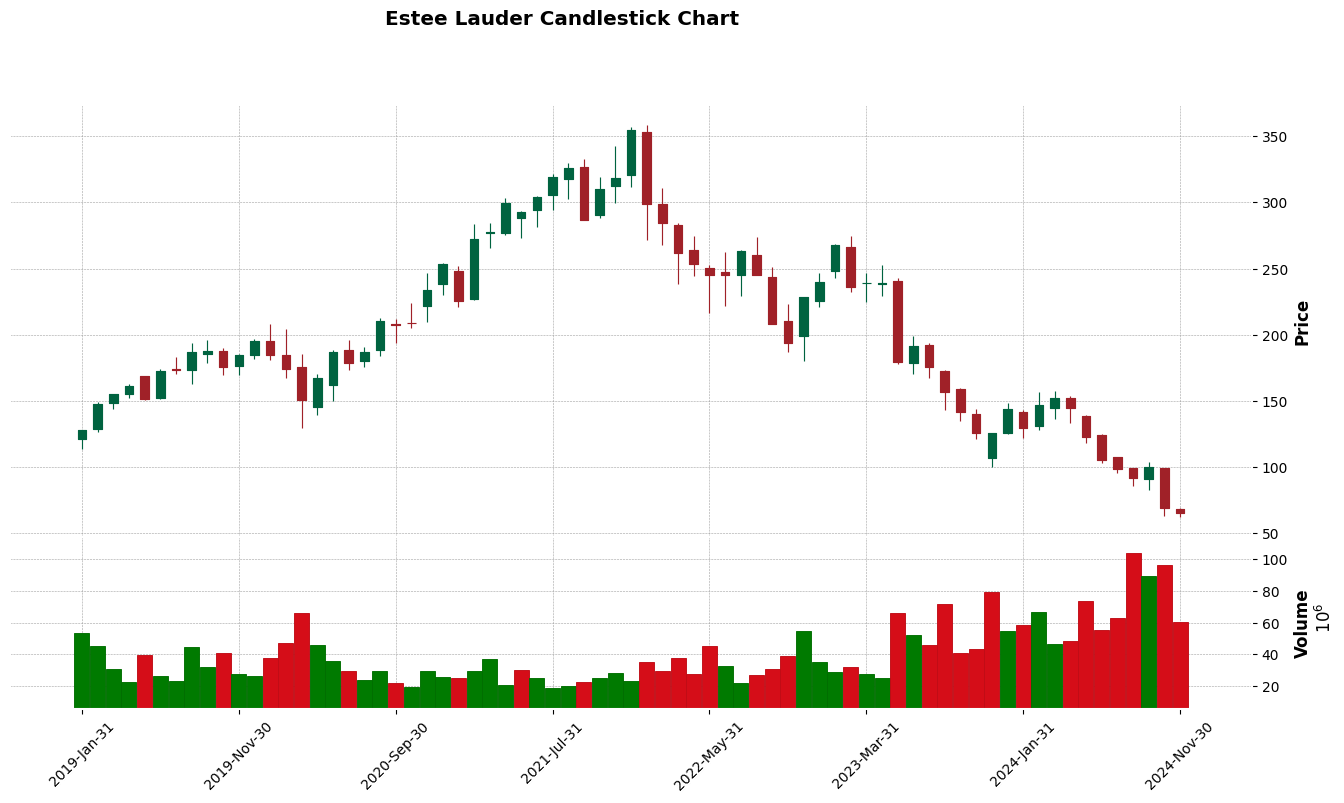

In [7]:
mpf.plot(stock_price_by_month, type='candle', volume=True, title='Estee Lauder Candlestick Chart', ylabel='Price', ylabel_lower='Volume', style='charles', figratio=(12, 6), figscale=1.5)

#### Conclusion:

**Stock Price Trend:** The line chart shows a strong upward from 2019 to mid-2021, then a significant decline of stock price. The sharp contrast between the rapid rise and strong drop in stock price can be attributed to several key reasons, which are mentioned earlier.

**Investor Sentiment through Trading Volume:** The bar chart shows high trading volume when price both increases and decreases. 
*During the price increase:* Although the stock price is rising, there are many Doji candlesticks( indicating uncertainty), which suggests that investors are hesitant and not fully committing to buying. The trading volume did not fluctuate significantly, reflecting a lack of conviction in continuing the upward trend. Multiple Doji candlesticks in a row may indicate that the upward trend could reverse and sharply decline in the future. 

*During the price decrease:* When the price started to fall, trading volume gradually increases over time, especially during sharp declines. This indicates that investors are selling off their stocks to avoid losses, reflecting panic and risk aversion.

***In conclusion, the candlestick chart and trading volumn clearly reflect investor sentiment: hesitaion and uncertainty when prices are rising, and fear and panic selling when prices are falling.***

# Statistics Measures Calculation

Here we pay attention to daily close price of stock. Find out the statistics measures of the stock close price per year for the 5 closest years. 

In [8]:
df['Close'].describe()
mean_close_price = df['Close'].mean()
med_close_price = df['Close'].median()
print (f"Mean close price: {mean_close_price}")
print (f"Median close price: {med_close_price}")

Mean close price: 202.86573714384605
Median close price: 192.5741271972656


In [9]:
df.index = pd.to_datetime(df.index, utc = True)

descriptive_stats = df.groupby(df.index.year)['Close'].mean()
descriptive_stats = descriptive_stats.to_frame()
descriptive_stats.columns = ['Mean Close Price']
descriptive_stats['Count'] = df.groupby(df.index.year)['Close'].count()
descriptive_stats['Median Close Price'] = df.groupby(df.index.year)['Close'].median()
descriptive_stats['Mode Close Price'] = df.groupby(df.index.year)['Close'].agg(lambda x: round(x).value_counts().index[0])
descriptive_stats['Standard Deviation Close Price'] = df.groupby(df.index.year)['Close'].std()
descriptive_stats['Variance Close Price'] = df.groupby(df.index.year)['Close'].var()
descriptive_stats['Range Close Price'] = df.groupby(df.index.year)['Close'].agg(lambda x: x.max() - x.min())
descriptive_stats['Skewness Close Price'] = df.groupby(df.index.year)['Close'].skew()

descriptive_stats

,Mean Close Price,Count,Median Close Price,Mode Close Price,Standard Deviation Close Price,Variance Close Price,Range Close Price,Skewness Close Price
Date,,,,,,,,
2019,165.692260,252,171.312508,182.0,20.247126,409.946111,79.652779,-0.741981
2020,194.087744,253,194.070511,182.0,26.738594,714.952416,116.522095,0.147945
2021,297.216895,252,299.005890,276.0,28.018009,785.008835,130.292374,-0.348462
2022,248.372222,251,246.930527,256.0,31.639770,1001.075033,173.052521,0.716885
2023,185.886789,250,183.808472,246.0,47.193386,2227.215726,169.566063,0.179569
2024,115.239792,221,117.944206,143.0,24.608564,605.581442,93.196598,-0.204034


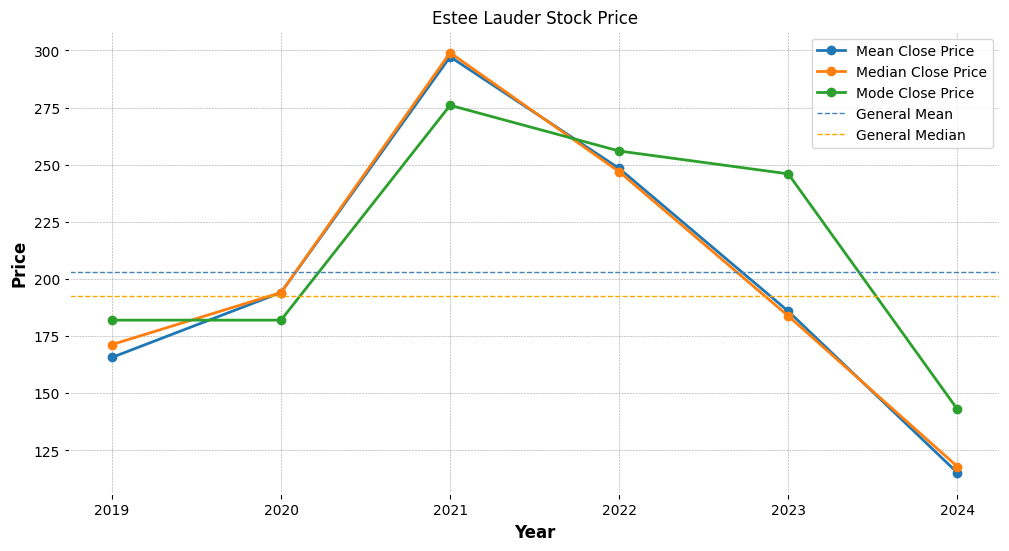

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(descriptive_stats.index, descriptive_stats['Mean Close Price'], label='Mean Close Price', marker='o')
plt.plot(descriptive_stats.index, descriptive_stats['Median Close Price'], label='Median Close Price', marker='o')
plt.plot(descriptive_stats.index, descriptive_stats['Mode Close Price'], label='Mode Close Price', marker='o')
plt.axhline(y=mean_close_price, color='steelblue', linestyle='--', linewidth=1, label='General Mean')
plt.axhline(y=med_close_price, color='orange', linestyle='--', linewidth=1, label='General Median')
plt.title('Estee Lauder Stock Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

## Central Measure Insights

Studying the central measures of Estee Lauder group of closing stock price over the nearest 5 years with general mean and meadian reference lines. We can come up with some insights:

**Increasing trend through 2020-2021 period:** In 2020-2021 period, significantly increased mean and median reflects the sharp surge in stock price. As mentioned before, the company's main product field has helped avoiding the crisis caused by COVID-19 pandemic, moreover, it contributed to the growth of stock price. However, there was a gap between the rise of mode compared to mean and median, showed that the general growth was effected by a few trading sessions with very high stock prices. This right-skewed increase might not be sustainable and could reverse later.

**Signs of decline trend since 2021:** 

*In 2021-2023:* Bad influence on the global economy and customer spending of surging COVID-19 pandemic in the first half of 2021 led to the downtrend of cosmetics industry, especially luxury brand like Estee Lauder. Both median and mean decrease sharply but mode did not change much indicating that the most common price might remain around in short term, and the overall price might strongly drop in the future.

*From 2023-now:* All indicators have dropped significantly since 2023, with mode experiencing the largest decline, indicate the ongoing general downtrend of stock price. The most decreasing of mode compared to mean and median reflects a shift to a much lower stock price level than before.If there is no positive change in macroeconomic or company-related factors, the stock price is likely to continue decreasing in the near future.

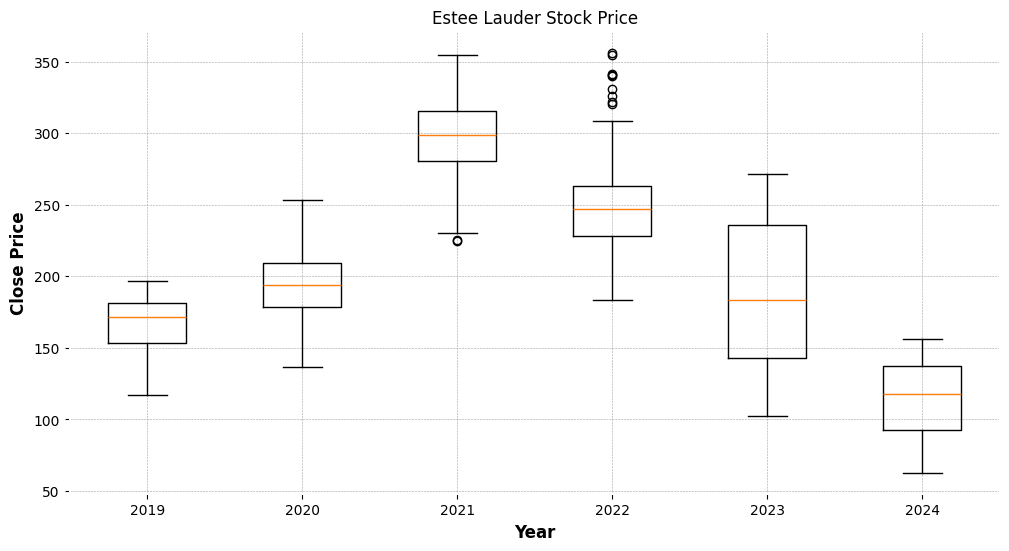

In [11]:
years = [2019, 2020, 2021, 2022, 2023, 2024]
def extract_data_by_year(year):
    year_df = df['Close'][df.index.year == year]
    year_df.reset_index(drop=True, inplace=True)
    year_df = year_df.to_frame()
    year_df.columns = [year]
    return year_df
close_price_2019 = extract_data_by_year(2019)
close_price_2020 = extract_data_by_year(2020)
close_price_2021 = extract_data_by_year(2021)
close_price_2022 = extract_data_by_year(2022)
close_price_2023 = extract_data_by_year(2023)
close_price_2024 = extract_data_by_year(2024)

plt.figure(figsize=(12, 6))
plt.boxplot([close_price_2019[2019], close_price_2020[2020], close_price_2021[2021], close_price_2022[2022], close_price_2023[2023], close_price_2024[2024]], tick_labels=years)
plt.title('Estee Lauder Stock Price')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.show()

# Dispersion Measures Insights
This box plot provides additional insights into Estee Lauder's stock price distribution across each year and can be combined with the previous charts analysis to gain a fuller understanding. Here are the key observations:

**Upward trend in 2019-2021:** Although having some fluctuation in median lines, the stock price experienced general upward trend. The higher box year after year in the period shows that the stock price in this period tended to increase. However, longer whiskers in post-boxes suggest that there was a significant volatility. Combining with the new appearance of an outlier below the 2021 box and the conclusion of investor's hesitation sentiment from previous candlestick chart, the stock's trading behavior had shown investor's loss of confidence and fear.

**Continously downward trend since 2021:** From 2021 up to now, the boxes continue to reach lower, which means that the price range tends to decrease. 

In 2022, existence of upper outliers depending on short-term changes in business strategy( including investment in online sales channels, sub-brands expansion) could not have remarkable contribution to revive the declining stock price.

Year 2023's box was much wider than earlier boxes, reflecting a broader range of stock prices and increased volatility. In general, the price still suffered downward trend.

By 2024, the box had narrowed, indicating a more stable but falling down to be the lowest box of the 5-year period.


# Overall conclusion
*In the 5-year period of Estee Lauder's stock price, it has gone through two completely distinct phases: a period of strong growth, followed by a sharp decline. The general economic challenges and the difficulties within the company's product high pricing segment have caused the stock price to drop rapidly. It is hard to predict how the stock price will evolve in the future.*